In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
data=pd.read_csv("british_airways_reviews_extended.csv")
data.isnull().sum()

Reviews                      0
Jet Type                  1868
Traveller Type             771
Route                      776
Date                       778
Seat Comfort               126
Cabin Staff Service        141
Food & Beverages           434
Inflight Entertainment    1234
Ground Service             850
WiFi & Connectivity       3215
Value for Money              0
Recommended                  0
dtype: int64

In [185]:
# Drop rows with missing critical columns
data_cleaned = data.dropna(subset=['Jet Type', 'Traveller Type', 'Route'])

In [186]:
# Fill missing values for numerical columns (example: WiFi & Connectivity)
columns_to_fill = [
    'Seat Comfort',
    'Cabin Staff Service',
    'Food & Beverages',
    'Inflight Entertainment',
    'Ground Service',
    'WiFi & Connectivity',
    'Value for Money'
]

In [187]:
data_cleaned[columns_to_fill] = data_cleaned[columns_to_fill].fillna(0)


C:\Users\kunal\AppData\Local\Temp\ipykernel_22944\2547398702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columns_to_fill] = data_cleaned[columns_to_fill].fillna(0)


In [188]:
data_cleaned = data_cleaned.drop(columns=['Date'])

In [189]:
data_cleaned.isnull().sum()

Reviews                   0
Jet Type                  0
Traveller Type            0
Route                     0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Inflight Entertainment    0
Ground Service            0
WiFi & Connectivity       0
Value for Money           0
Recommended               0
dtype: int64

In [190]:
data_cleaned 

,Reviews,Jet Type,Traveller Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,WiFi & Connectivity,Value for Money,Recommended
0,This was the first time I flew British Airways...,Boeing 777 / A350,Business,Washington to London,4.0,3.0,1.0,5.0,1.0,4.0,1,no
1,Pretty good flight but still some small things...,Boeing 777,Solo Leisure,Cape Town to London,5.0,5.0,5.0,5.0,4.0,0.0,5,yes
2,"Check in was fine, but no priority/fast track ...",Boeing 787,Solo Leisure,Mexico City to London Heathrow,5.0,5.0,3.0,3.0,4.0,4.0,4,yes
4,The flight time was changed at the last minute...,A320,Solo Leisure,Marrakesh to London,2.0,2.0,1.0,1.0,1.0,0.0,1,no
8,"Although like many these days, I avoid BA on l...",A321,Family Leisure,London to Belfast,3.0,2.0,0.0,0.0,5.0,0.0,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...
3124,"FRA-LHR on A319, We sat on the plane at the ga...",A319,Business,FRA-LHR,5.0,2.0,2.0,1.0,0.0,0.0,1,no
3125,Flew Club World from Gatwick to Barbados in Ap...,Boeing 777,Couple Leisure,Gatwick to Barbados,3.0,4.0,3.0,4.0,0.0,0.0,3,no
3126,Flew from Kiev to London on their Airbus 319 i...,Airbus 319,Business,Kiev to London,3.0,5.0,0.0,4.0,0.0,1.0,4,yes
3128,LHR to YVR return. Hard earned Avios points tr...,Boeing 747-400,Business,London-Vancouver return,4.0,5.0,4.0,3.0,0.0,0.0,5,yes


In [191]:
# Top 5 most common traveller types
print(data_cleaned['Traveller Type'].value_counts().head())

# Top 5 most common routes
print(data_cleaned['Route'].value_counts().head())

# Top 5 most common traveller types
print(data_cleaned['Jet Type'].value_counts().head())

# Convert 'Recommended' column to binary: 1 for 'yes', 0 for 'no'
data_cleaned['Recommended'] = data_cleaned['Recommended'].map({'yes': 1, 'no': 0})



Traveller Type
Couple Leisure    702
Solo Leisure      611
Business          468
Family Leisure    250
Name: count, dtype: int64
Route
London to Johannesburg    18
Vancouver to London       15
Johannesburg to London    13
Cape Town to London       13
LHR to MIA                11
Name: count, dtype: int64
Jet Type
A320              392
Boeing 777        286
Boeing 747-400    182
A380              178
Boeing 777-200    129
Name: count, dtype: int64


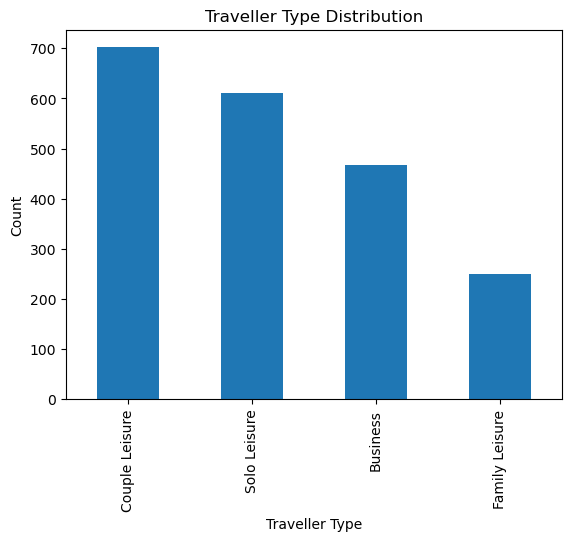

In [192]:
data_cleaned['Traveller Type'].value_counts().plot(kind='bar')
plt.title('Traveller Type Distribution')
plt.xlabel('Traveller Type')
plt.ylabel('Count')
plt.show()

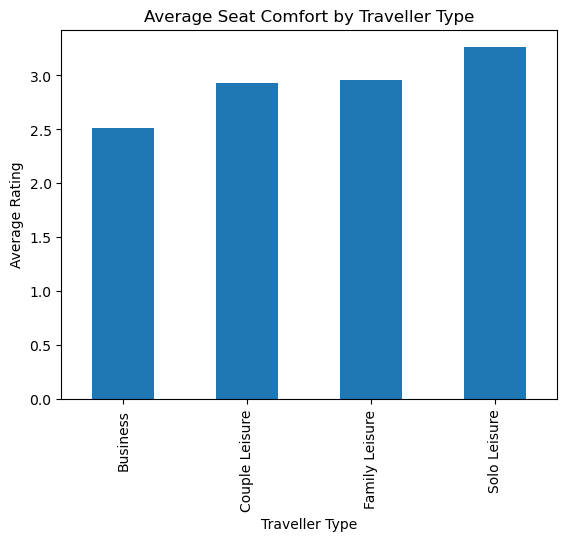

In [193]:
seat_comfort_avg = data_cleaned.groupby('Traveller Type')['Seat Comfort'].mean()
seat_comfort_avg.plot(kind='bar', title='Average Seat Comfort by Traveller Type')
plt.ylabel('Average Rating')
plt.show()


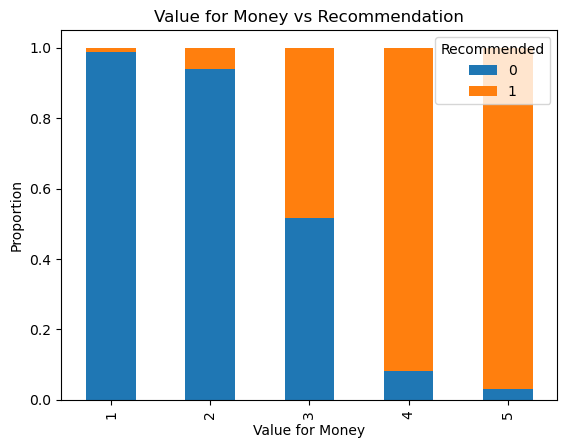

In [194]:
recommendation_counts = data_cleaned.groupby('Value for Money')['Recommended'].value_counts(normalize=True).unstack()
recommendation_counts.plot(kind='bar', stacked=True)
plt.title('Value for Money vs Recommendation')
plt.ylabel('Proportion')
plt.show()


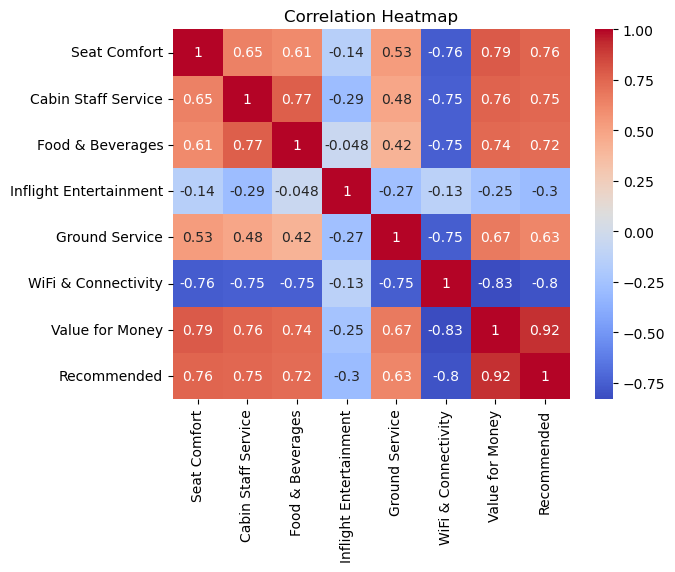

In [195]:
# Drop 'Reviews', 'Date', 'Jet Type', and 'Traveller Type' columns
columns_to_drop = ['Reviews','Jet Type', 'Traveller Type', 'Route']
data_reduced = data_cleaned.drop(columns=columns_to_drop)

# Calculate the correlation matrix
correlation_matrix_reduced = data_reduced.corr()

# Display the correlation matrix
correlation_matrix_reduced

# Visualize correlations
sns.heatmap(correlation_matrix_reduced.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [196]:
data_cleaned['avg_rate']=(data_cleaned['Seat Comfort']+data_cleaned['Seat Comfort']+data_cleaned['Seat Comfort']+data_cleaned['Cabin Staff Service']+data_cleaned['Food & Beverages']+data_cleaned['Inflight Entertainment']+data_cleaned['Ground Service']+data_cleaned['WiFi & Connectivity']+data_cleaned['Value for Money'])/7

In [197]:
import pandas as pd

# Sample DataFrame (you already have 'new_data')
# Reset index and start the id column at 1
data_cleaned.reset_index(drop=True, inplace=True)  # Drop existing index
data_cleaned['id'] = range(1, len(data_cleaned) + 1)  # Add id column starting from 1

# Reorder columns to make 'id' the first column
data_cleaned = data_cleaned[['id'] + [col for col in data_cleaned.columns if col != 'id']]

# Display the updated DataFrame
print(data_cleaned.head())

   id                                            Reviews           Jet Type  \
0   1  This was the first time I flew British Airways...  Boeing 777 / A350   
1   2  Pretty good flight but still some small things...         Boeing 777   
2   3  Check in was fine, but no priority/fast track ...         Boeing 787   
3   4  The flight time was changed at the last minute...               A320   
4   5  Although like many these days, I avoid BA on l...               A321   

   Traveller Type                           Route  Seat Comfort  \
0        Business            Washington to London           4.0   
1    Solo Leisure             Cape Town to London           5.0   
2    Solo Leisure  Mexico City to London Heathrow           5.0   
3    Solo Leisure             Marrakesh to London           2.0   
4  Family Leisure               London to Belfast           3.0   

   Cabin Staff Service  Food & Beverages  Inflight Entertainment  \
0                  3.0               1.0              

In [198]:
data_cleaned['avg_rate'] = data_cleaned['avg_rate'].round(2)

data_cleaned

,id,Reviews,Jet Type,Traveller Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,WiFi & Connectivity,Value for Money,Recommended,avg_rate
0,1,This was the first time I flew British Airways...,Boeing 777 / A350,Business,Washington to London,4.0,3.0,1.0,5.0,1.0,4.0,1,0,3.86
1,2,Pretty good flight but still some small things...,Boeing 777,Solo Leisure,Cape Town to London,5.0,5.0,5.0,5.0,4.0,0.0,5,1,5.57
2,3,"Check in was fine, but no priority/fast track ...",Boeing 787,Solo Leisure,Mexico City to London Heathrow,5.0,5.0,3.0,3.0,4.0,4.0,4,1,5.43
3,4,The flight time was changed at the last minute...,A320,Solo Leisure,Marrakesh to London,2.0,2.0,1.0,1.0,1.0,0.0,1,0,1.71
4,5,"Although like many these days, I avoid BA on l...",A321,Family Leisure,London to Belfast,3.0,2.0,0.0,0.0,5.0,0.0,5,0,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2027,"FRA-LHR on A319, We sat on the plane at the ga...",A319,Business,FRA-LHR,5.0,2.0,2.0,1.0,0.0,0.0,1,0,3.00
2027,2028,Flew Club World from Gatwick to Barbados in Ap...,Boeing 777,Couple Leisure,Gatwick to Barbados,3.0,4.0,3.0,4.0,0.0,0.0,3,0,3.29
2028,2029,Flew from Kiev to London on their Airbus 319 i...,Airbus 319,Business,Kiev to London,3.0,5.0,0.0,4.0,0.0,1.0,4,1,3.29
2029,2030,LHR to YVR return. Hard earned Avios points tr...,Boeing 747-400,Business,London-Vancouver return,4.0,5.0,4.0,3.0,0.0,0.0,5,1,4.14


In [199]:
# Select relevant columns
correlation_matrix_reduced = data_cleaned[['Recommended', 'avg_rate']].corr()

# Display the correlation matrix
print(correlation_matrix_reduced)

             Recommended  avg_rate
Recommended      1.00000   0.75578
avg_rate         0.75578   1.00000


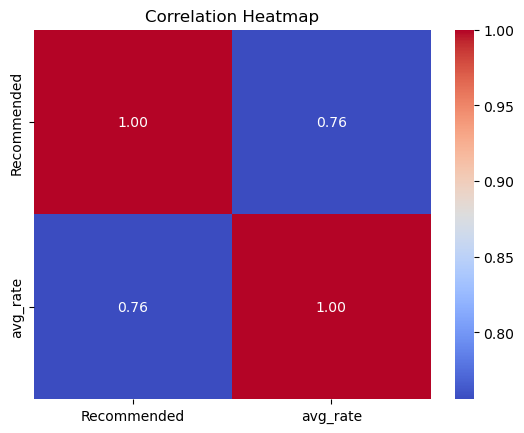

In [200]:
# Visualize correlations as a heatmap
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [201]:
# Select specific columns from the DataFrame
new_data = data_cleaned[['id','Reviews', 'avg_rate', 'Recommended']]


<Axes: title={'center': 'Count of Avg_reviews'}, xlabel='avg_rate'>

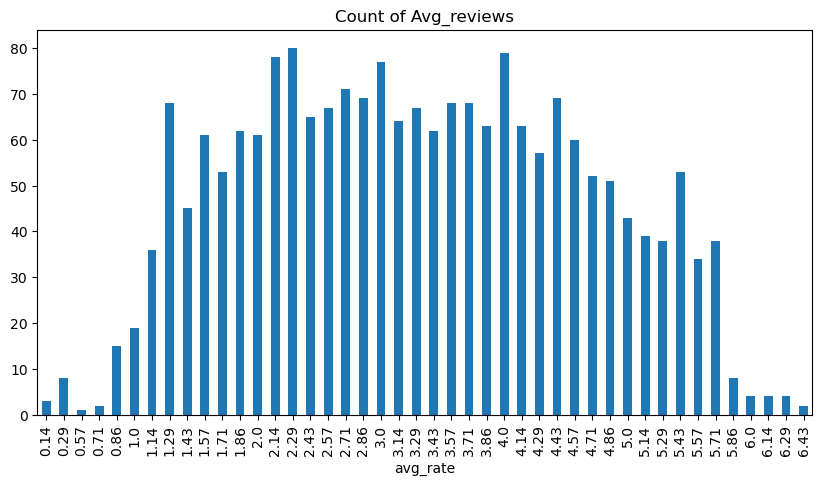

In [202]:
new_data['avg_rate'].value_counts().sort_index().plot(kind='bar', title ='Count of Avg_reviews', figsize =(10,5))

**Sentiment Analysis Using VADER's Sentiment Scoring**

In [203]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [204]:
sia=SentimentIntensityAnalyzer()

In [205]:
result={}
for i, row in tqdm(data_cleaned.iterrows(), total=len(data_cleaned)):
        text = row['Reviews']
        my_id = row['id']
        result[my_id] = sia.polarity_scores(text)
        

  0%|          | 0/2031 [00:00<?, ?it/s]

In [206]:
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns={'Index': 'id'})

In [207]:
# Add an index-based key column
vaders['key'] = range(1, len(vaders) + 1)
data_cleaned['key'] = range(1, len(new_data) + 1)

# Merge on the 'key' column
vaders = vaders.merge(data_cleaned, how='left', on='key')


In [208]:
vaders

,index,neg,neu,pos,compound,key,id,Reviews,Jet Type,Traveller Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,WiFi & Connectivity,Value for Money,Recommended,avg_rate
0,1,0.119,0.853,0.028,-0.9716,1,1,This was the first time I flew British Airways...,Boeing 777 / A350,Business,Washington to London,4.0,3.0,1.0,5.0,1.0,4.0,1,0,3.86
1,2,0.032,0.737,0.231,0.9972,2,2,Pretty good flight but still some small things...,Boeing 777,Solo Leisure,Cape Town to London,5.0,5.0,5.0,5.0,4.0,0.0,5,1,5.57
2,3,0.075,0.727,0.198,0.9808,3,3,"Check in was fine, but no priority/fast track ...",Boeing 787,Solo Leisure,Mexico City to London Heathrow,5.0,5.0,3.0,3.0,4.0,4.0,4,1,5.43
3,4,0.156,0.758,0.085,-0.6747,4,4,The flight time was changed at the last minute...,A320,Solo Leisure,Marrakesh to London,2.0,2.0,1.0,1.0,1.0,0.0,1,0,1.71
4,5,0.119,0.814,0.066,-0.6663,5,5,"Although like many these days, I avoid BA on l...",A321,Family Leisure,London to Belfast,3.0,2.0,0.0,0.0,5.0,0.0,5,0,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2027,0.117,0.883,0.000,-0.6369,2027,2027,"FRA-LHR on A319, We sat on the plane at the ga...",A319,Business,FRA-LHR,5.0,2.0,2.0,1.0,0.0,0.0,1,0,3.00
2027,2028,0.056,0.733,0.211,0.9955,2028,2028,Flew Club World from Gatwick to Barbados in Ap...,Boeing 777,Couple Leisure,Gatwick to Barbados,3.0,4.0,3.0,4.0,0.0,0.0,3,0,3.29
2028,2029,0.091,0.785,0.123,0.4754,2029,2029,Flew from Kiev to London on their Airbus 319 i...,Airbus 319,Business,Kiev to London,3.0,5.0,0.0,4.0,0.0,1.0,4,1,3.29
2029,2030,0.065,0.771,0.165,0.9808,2030,2030,LHR to YVR return. Hard earned Avios points tr...,Boeing 747-400,Business,London-Vancouver return,4.0,5.0,4.0,3.0,0.0,0.0,5,1,4.14


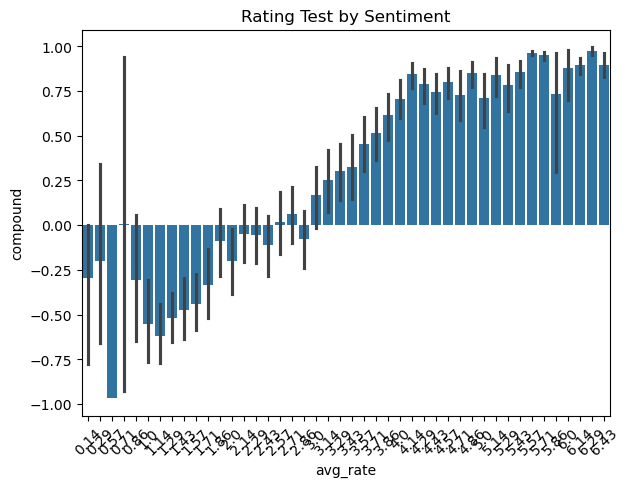

In [210]:
ax=sns.barplot(data=vaders, x='avg_rate' , y='compound')
ax.set_title('Rating Test by Sentiment')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='avg_rate', ylabel='compound'>

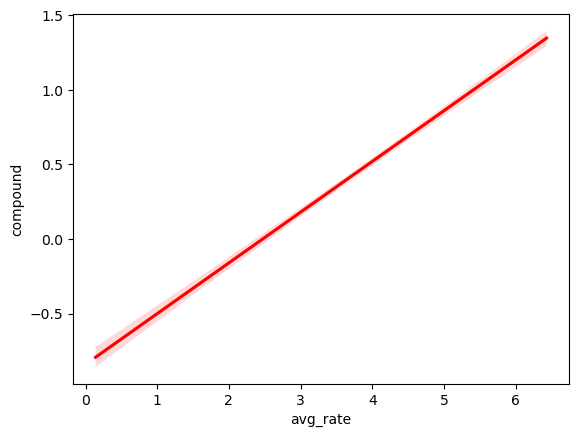

In [211]:
import seaborn as sns

# Use a line plot for clarity
sns.regplot(x='avg_rate', y='compound', data=vaders, scatter=False, color='red')


In [212]:
# Select relevant columns
correlation_matrix_reduced = vaders[['Recommended', 'avg_rate', 'compound']].corr()

# Display the correlation matrix
print(correlation_matrix_reduced)

             Recommended  avg_rate  compound
Recommended     1.000000   0.75578  0.589951
avg_rate        0.755780   1.00000  0.596280
compound        0.589951   0.59628  1.000000


In [214]:
# Aggregate sentiment by categories
sentiment_by_route = vaders.groupby('Route')['compound'].mean().sort_values()
sentiment_by_jet_type = vaders.groupby('Jet Type')['compound'].mean().sort_values()
sentiment_by_traveller = vaders.groupby('Traveller Type')['compound'].mean().sort_values()

C:\Users\kunal\AppData\Local\Temp\ipykernel_22944\942765276.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\kunal\AppData\Local\Temp\ipykernel_22944\942765276.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


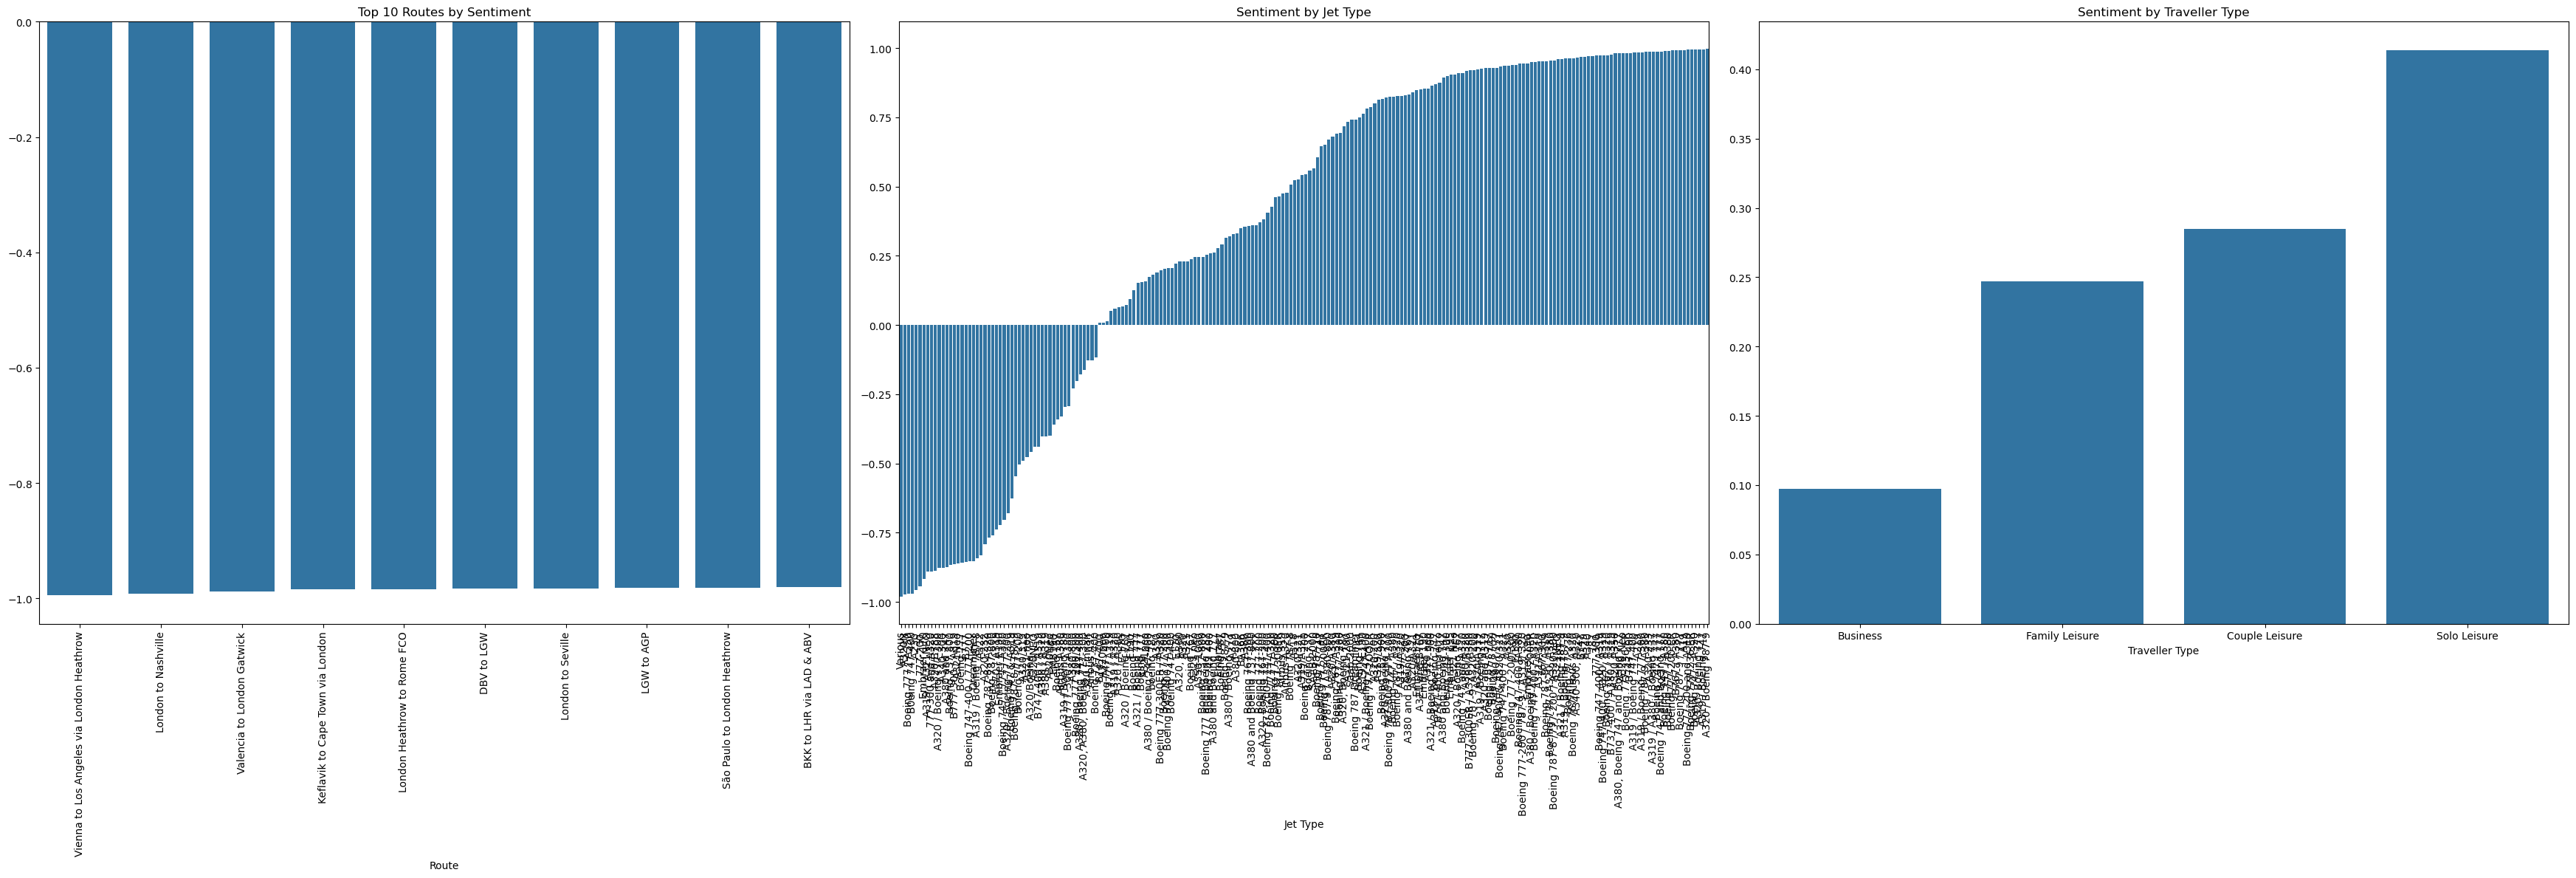

compound                  1.000000
Value for Money           0.580255
Cabin Staff Service       0.519661
Seat Comfort              0.503596
Ground Service            0.498199
Food & Beverages          0.485529
Inflight Entertainment    0.239510
WiFi & Connectivity       0.034155
Name: compound, dtype: float64

In [220]:
# Visualize the results
fig, ax = plt.subplots(1, 3, figsize=(35, 12))

# Sentiment by Route
sns.barplot(x=sentiment_by_route.index[:10], y=sentiment_by_route.values[:10], ax=ax[0])
ax[0].set_title('Top 10 Routes by Sentiment')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

# Sentiment by Jet Type
sns.barplot(x=sentiment_by_jet_type.index, y=sentiment_by_jet_type.values, ax=ax[1])
ax[1].set_title('Sentiment by Jet Type')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

# Sentiment by Traveller Type
sns.barplot(x=sentiment_by_traveller.index, y=sentiment_by_traveller.values, ax=ax[2])
ax[2].set_title('Sentiment by Traveller Type')

plt.tight_layout()
plt.show()

# Correlation analysis to see factors affecting sentiment
correlation_data = vaders[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                         'Inflight Entertainment', 'Ground Service', 'WiFi & Connectivity',
                         'Value for Money', 'compound']].corr()

correlation_data['compound'].sort_values(ascending=False)

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

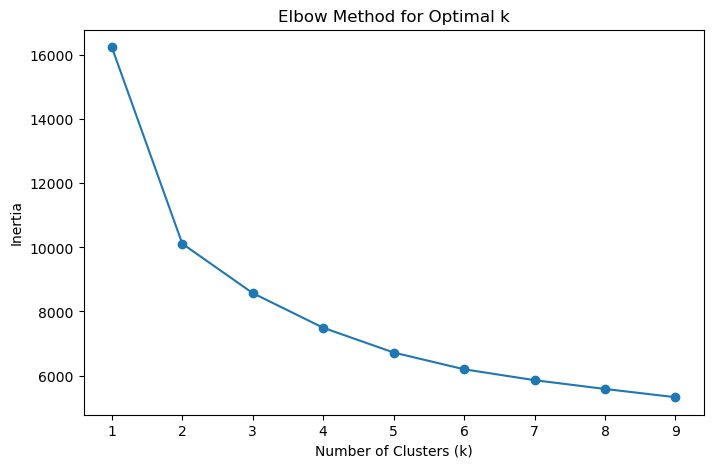

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


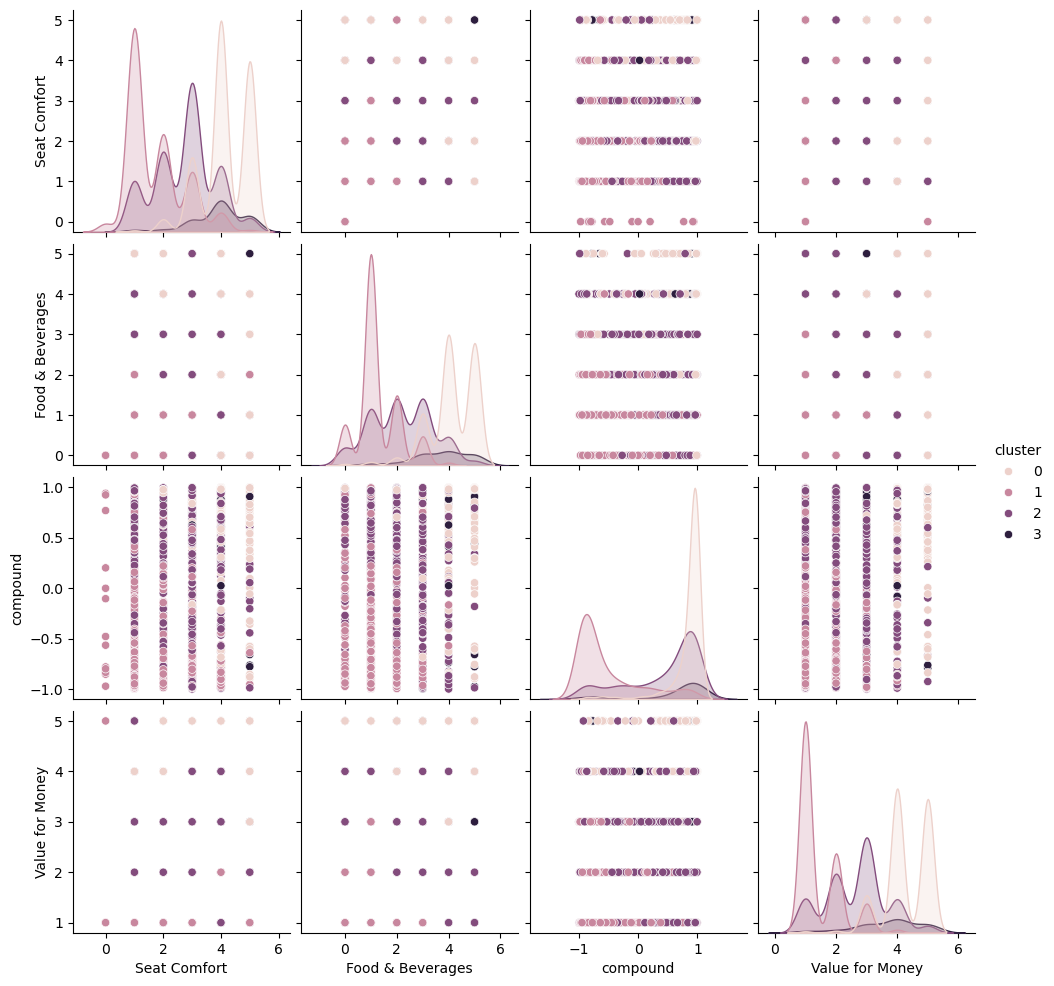

(   Seat Comfort  Cabin Staff Service  Food & Beverages  \
 0      4.141287             4.624804          4.119309   
 1      1.702532             1.927215          1.270570   
 2      2.753577             3.378378          2.189189   
 3      3.894737             4.285714          3.669173   
 
    Inflight Entertainment  Ground Service  WiFi & Connectivity  \
 0                2.675039        4.171115             0.053375   
 1                1.112342        1.830696             0.325949   
 2                1.367250        3.079491             0.146264   
 3                3.428571        3.684211             3.834586   
 
    Value for Money  compound  
 0         4.274725  0.846777  
 1         1.460443 -0.527125  
 2         2.650238  0.428743  
 3         3.691729  0.631875  ,
    index    neg    neu    pos  compound  key  id  \
 0      1  0.119  0.853  0.028   -0.9716    1   1   
 1      2  0.032  0.737  0.231    0.9972    2   2   
 2      3  0.075  0.727  0.198    0.9808    3 

In [225]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocessing: Select relevant features for clustering
clustering_data = vaders[[
    'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
    'Inflight Entertainment', 'Ground Service', 'WiFi & Connectivity',
    'Value for Money', 'compound'
]].fillna(0)  # Fill missing values with 0

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means clustering with optimal k (visually determined, default to 4)
kmeans = KMeans(n_clusters=4, random_state=42)
vaders['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters (pair plot for selected features)
import seaborn as sns
sns.pairplot(vaders, hue='cluster', vars=[
    'Seat Comfort', 'Food & Beverages', 'compound', 'Value for Money'
])
plt.show()

# Return cluster centers and a preview of the clustered data
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=clustering_data.columns)
cluster_centers, vaders.head()


In [224]:
vaders

,index,neg,neu,pos,compound,key,id,Reviews,Jet Type,Traveller Type,...,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,WiFi & Connectivity,Value for Money,Recommended,avg_rate,cluster
0,1,0.119,0.853,0.028,-0.9716,1,1,This was the first time I flew British Airways...,Boeing 777 / A350,Business,...,4.0,3.0,1.0,5.0,1.0,4.0,1,0,3.86,3
1,2,0.032,0.737,0.231,0.9972,2,2,Pretty good flight but still some small things...,Boeing 777,Solo Leisure,...,5.0,5.0,5.0,5.0,4.0,0.0,5,1,5.57,0
2,3,0.075,0.727,0.198,0.9808,3,3,"Check in was fine, but no priority/fast track ...",Boeing 787,Solo Leisure,...,5.0,5.0,3.0,3.0,4.0,4.0,4,1,5.43,3
3,4,0.156,0.758,0.085,-0.6747,4,4,The flight time was changed at the last minute...,A320,Solo Leisure,...,2.0,2.0,1.0,1.0,1.0,0.0,1,0,1.71,1
4,5,0.119,0.814,0.066,-0.6663,5,5,"Although like many these days, I avoid BA on l...",A321,Family Leisure,...,3.0,2.0,0.0,0.0,5.0,0.0,5,0,3.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2027,0.117,0.883,0.000,-0.6369,2027,2027,"FRA-LHR on A319, We sat on the plane at the ga...",A319,Business,...,5.0,2.0,2.0,1.0,0.0,0.0,1,0,3.00,1
2027,2028,0.056,0.733,0.211,0.9955,2028,2028,Flew Club World from Gatwick to Barbados in Ap...,Boeing 777,Couple Leisure,...,3.0,4.0,3.0,4.0,0.0,0.0,3,0,3.29,2
2028,2029,0.091,0.785,0.123,0.4754,2029,2029,Flew from Kiev to London on their Airbus 319 i...,Airbus 319,Business,...,3.0,5.0,0.0,4.0,0.0,1.0,4,1,3.29,2
2029,2030,0.065,0.771,0.165,0.9808,2030,2030,LHR to YVR return. Hard earned Avios points tr...,Boeing 747-400,Business,...,4.0,5.0,4.0,3.0,0.0,0.0,5,1,4.14,0


Mean Squared Error: 0.4238
Feature Importance from Random Forest:
Seat Comfort: 0.1050
Cabin Staff Service: 0.1368
Food & Beverages: 0.1042
Inflight Entertainment: 0.1082
Ground Service: 0.1168
WiFi & Connectivity: 0.0478
Value for Money: 0.3812


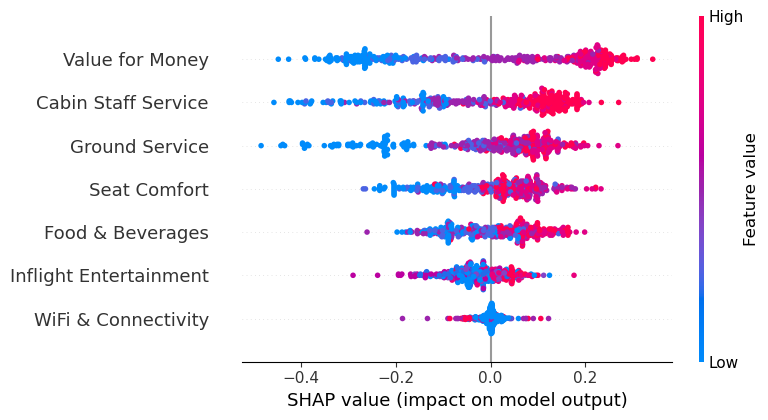

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.metrics import mean_squared_error
# Select features and target
features = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
            'Inflight Entertainment', 'Ground Service', 'WiFi & Connectivity', 
            'Value for Money']  # Predictor variables
target = 'compound'  # For sentiment analysis (change to 'avg_rate' for ratings)

X = vaders[features].fillna(0)  # Fill missing values
y = vaders[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Model
y_pred = rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

# Feature Importance
print("Feature Importance from Random Forest:")
for feature, importance in zip(features, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# SHAP Analysis
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [235]:
positive_reviews = vaders[vaders['compound'] > 0.].shape[0]
neutral_reviews = vaders[vaders['compound'] == 0.].shape[0]
negative_reviews = vaders[vaders['compound'] < 0.].shape[0]

In [237]:
positive_reviews,neutral_reviews,negative_reviews

(1317, 3, 711)

In [238]:
total = positive_reviews+neutral_reviews+negative_reviews

In [242]:
positive_reviews_percentage = (positive_reviews/total)*100
neutral_reviews_percentage = (neutral_reviews/total)*100
negative_reviews_percentage = (negative_reviews/total)*100


In [243]:
positive_reviews_percentage,neutral_reviews_percentage,negative_reviews_percentage

(64.84490398818316, 0.14771048744460857, 35.00738552437223)

In [244]:
total

2031